# **Tutorial on Text as Data**: TF-IDF and Naive Bayes

Source:  [https://github.com/d-insight/code-bank.git](https://github.com/d-insight/code-bank.git)  
License: [MIT License](https://opensource.org/licenses/MIT). See open source [license](LICENSE) in the Code Bank repository. 

---

### Overview

In this notebook we will try to classify positive and negative reviews. We will starts with a simple approach (TF-IDF + Naive Bayes) to create a baseline and then we will improve the model using neural networks.

![naive bayes](./images/naive-bayes.jpg)

Q1: Load the `yelp_review.csv` dataset and store it under `df`

In [1]:
import pandas as pd

import numpy as np
# Fix random seed for reproducibility
np.random.seed(42)

df = pd.read_csv("./data/yelp_review.csv")
df.shape

(150000, 3)

Q2: Let's start by simplifing a bit the problem by transforming the `stars` column into a boolean feature composed of positive and negative sentiments.

By looking at the `median` and `mean` value of the `stars` columns, pick a good threshold and generate the `target` column. All reviews with a stars rating above such threshold will be targeted as `1` and the rest will be set as `0`.

In [2]:
print("Stars median: ", df['stars'].median())
print("Stars mean: ", df['stars'].mean())

Stars median:  4.0
Stars mean:  3.6967733333333332


In [3]:
df['target'] = (df['stars'] > 4) * 1
df.head(2)

,stars,text,business_id,target
0,2.0,Be prepared to be greeted by a bland cashier w...,iWGO0_z8Rdwd3ZViapwRhg,0
1,5.0,The service department saved us today. The rem...,QuYAh94UZzHuy9McaeovKg,1


Q3: Look at the target distribution. Is that even distributed? What's the baseline we will need to beat?

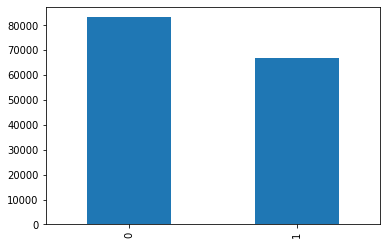

In [4]:
df['target'].value_counts().plot.bar();

In [5]:
df['target'].value_counts(normalize=True)

0    0.554847
1    0.445153
Name: target, dtype: float64

Q4: Split the DataFrame into a `train_df` (80%) and `test_df` (20%). You can use scikit-learn `train_test_split`.

In [6]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("train_df.shape: ", train_df.shape)
print("test_df.shape: ", test_df.shape)

train_df.shape:  (120000, 4)
test_df.shape:  (30000, 4)


Q5: Fit a `TfidfVectorizer` from scikit-learn with `max_features=500` on `train_df['text']` and store it under `X_train`

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500)

X_train = tfidf_vectorizer.fit_transform(train_df['text']).toarray()

Q6: Fit the `test_df` and store it under `X_test`

In [8]:
X_test = tfidf_vectorizer.transform(test_df['text']).toarray()

Q7: Get `y_train` and `y_test` target as numpy array

In [9]:
y_train = train_df['target'].to_numpy()
y_test = test_df['target'].to_numpy()

Q8: Apply Naive Bayes and predict the `y_predicted` values using [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [10]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

gnb = GaussianNB()

y_predicted = gnb.fit(X_train, y_train).predict(X_test)

Q9: Display the accuracy as well as the roc_auc_score

In [11]:
from sklearn.metrics import accuracy_score

print(f"Accuracy score: {accuracy_score(y_predicted, y_test)}")

from sklearn.metrics import roc_auc_score

print(f"Roc-auc score: {roc_auc_score(y_predicted, y_test)}")

Accuracy score: 0.7687333333333334
Roc-auc score: 0.7661292360321487
